# Football events 

Anaconda python ver 2

This is data of footballing events in europe. As an avid fan of football and sport in general I wanted to have a look at a sporting data set. This will an exploratory analysis.

source - https://www.kaggle.com/secareanualin/football-events

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns

# events = pd.read_csv("../input/events.csv")
# game_info=pd.read_csv("../input/ginf.csv")

plt.style.use('seaborn')
%matplotlib inline

In [60]:
import plotly.plotly as py
import plotly.figure_factory as ff

In [2]:
events = pd.read_csv("input/football-events/events.csv")

In [3]:
ginf = pd.read_csv("input/football-events/ginf.csv")

In [4]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [5]:
ginf.tail()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.0,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.0,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.5,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.9,2.20,1.89,2.05,1.86
10111,z5L2OT5E/,/soccer/italy/serie-a/atalanta-sampdoria-z5L2O...,True,2017-01-22,I1,2017,italy,Atalanta,Sampdoria,1,0,1.79,3.96,5.4,1.90,2.07,1.80,2.16


In [6]:
df3 = pd.read_csv("input/football-events/dictionary.txt",header= None)

In [7]:
df3.head()

,0
0,event_type
1,0\tAnnouncement
2,1\tAttempt
3,2\tCorner
4,3\tFoul


In [8]:
df3.shape

(75, 1)

We can see that we need to split the file into multiple dictionaries so that we can sub them in for the numbers in some columns in the other data frames

In [9]:
df3[['id','name']] = df3.loc[:,0].str.split('\t',expand=True)
df3.drop(df3.columns[0], axis=1,inplace = True)

In [10]:
df3.id = pd.to_numeric(df3.id, errors='coerce')

In [11]:
et1 = df3[1:13]
et2 = df3[14:18]
side = df3[19:21]
shot_place = df3[22:35]
shot_outcome = df3[36:40]
location = df3[41:60]
bodypart =df3[61:64]
assist_method = df3[65:70]
situation = df3[71:75]

In [12]:
et1_dict  = list(et1.set_index('id').to_dict().values()).pop()
et2_dict  = list(et2.set_index('id').to_dict().values()).pop()
side_dict  = list(side.set_index('id').to_dict().values()).pop()
shot_place_dict  = list(shot_place.set_index('id').to_dict().values()).pop()
shot_outcome_dict  = list(shot_outcome.set_index('id').to_dict().values()).pop()
location_dict  = list(location.set_index('id').to_dict().values()).pop()
bodypart_dict  = list(bodypart.set_index('id').to_dict().values()).pop()
assist_method_dict  = list(assist_method.set_index('id').to_dict().values()).pop()
situation_dict  = list(situation.set_index('id').to_dict().values()).pop()

In [13]:
events['event_type'] = events['event_type'].map(et1_dict)
events['event_type2'] = events['event_type2'].map(et2_dict)
events['side'] = events['side'].map(side_dict)
events['shot_place'] = events['shot_place'].map(shot_place_dict)
events['shot_outcome'] = events['shot_outcome'].map(shot_outcome_dict)
events['location'] = events['location'].map(location_dict)
events['bodypart'] = events['bodypart'].map(bodypart_dict)
events['assist_method'] = events['assist_method'].map(assist_method_dict)
events['situation'] = events['situation'].map(situation_dict)

In [14]:
events[events.id_odsp =='ITbfCc8F/']

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
662715,ITbfCc8F/,ITbfCc8F1,1,0,"Corner, Chelsea. Conceded by Jefferson Montero.",Corner,NaN,Home,Chelsea,Swansea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662716,ITbfCc8F/,ITbfCc8F2,2,3,Foul by Nemanja Matic (Chelsea).,Foul,NaN,Home,Chelsea,Swansea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662717,ITbfCc8F/,ITbfCc8F3,3,3,Bafetimbi Gomis (Swansea City) wins a free kic...,Free kick won,NaN,Away,Swansea,Chelsea,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0
662718,ITbfCc8F/,ITbfCc8F4,4,4,"Corner, Chelsea. Conceded by Jefferson Montero.",Corner,NaN,Home,Chelsea,Swansea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662719,ITbfCc8F/,ITbfCc8F5,5,6,"Corner, Swansea City. Conceded by Branislav I...",Corner,NaN,Away,Swansea,Chelsea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662720,ITbfCc8F/,ITbfCc8F6,6,7,Attempt missed. Bafetimbi Gomis (Swansea City)...,Attempt,Key Pass,Away,Swansea,Chelsea,...,NaN,NaN,Misses to the right,Off target,0,Centre of the box,head,Cross,Corner,0
662721,ITbfCc8F/,ITbfCc8F7,7,7,"Corner, Swansea City. Conceded by Branislav I...",Corner,NaN,Away,Swansea,Chelsea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662722,ITbfCc8F/,ITbfCc8F8,8,10,Willian (Chelsea) wins a free kick in the defe...,Free kick won,NaN,Home,Chelsea,Swansea,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0
662723,ITbfCc8F/,ITbfCc8F9,9,10,Foul by Neil Taylor (Swansea City).,Foul,NaN,Away,Swansea,Chelsea,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
662724,ITbfCc8F/,ITbfCc8F10,10,10,Attempt missed. Bafetimbi Gomis (Swansea City)...,Attempt,Key Pass,Away,Swansea,Chelsea,...,NaN,NaN,Misses to the right,Off target,0,Centre of the box,head,Cross,Corner,0


# Exploring Match Events

In [15]:
events.id_odsp.nunique()

9074

In [16]:
goals=events[events["is_goal"]==1]

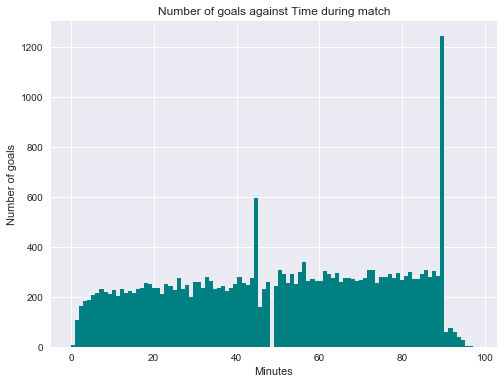

In [82]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals.time,width=1,bins=100,color="teal")   
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

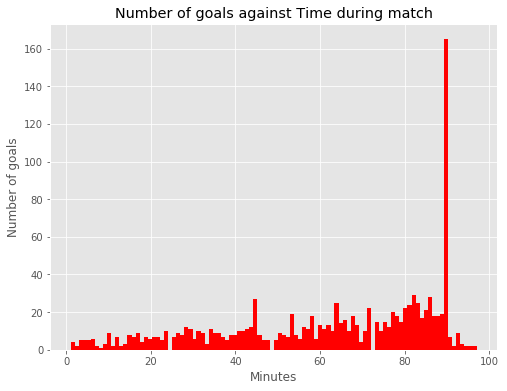

In [18]:
redcards=events[events["event_type"]=="Red card"]
fig=plt.figure(figsize=(8,6))
plt.hist(redcards.time,width=1,bins=100,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

In [19]:
substitutions = events[events['event_type'] == 'Substitution'] # selects substitutions

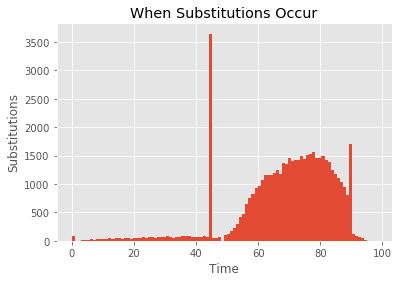

In [20]:
plt.hist(substitutions.time, 100)
plt.xlabel("Time")
plt.ylabel("Substitutions")
plt.title("When Substitutions Occur")
plt.show()

In [21]:
yellowcard=events[events["event_type"]=='Yellow card']
yellowcard2=events[events["event_type"]=='Second yellow card']
redcards=events[events["event_type"]=='Red card']

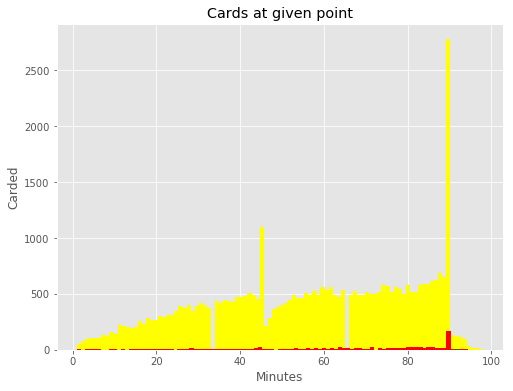

In [22]:
fig=plt.figure(figsize=(8,6))
plt.hist(yellowcard.time,width=1,bins=100,color="yellow")  
plt.hist(yellowcard2.time,width=1,bins=100,color="green") 
plt.hist(redcards.time,width=1,bins=100,color="red") 
plt.xlabel("Minutes")
plt.ylabel("Carded")
plt.title("Cards at given point")

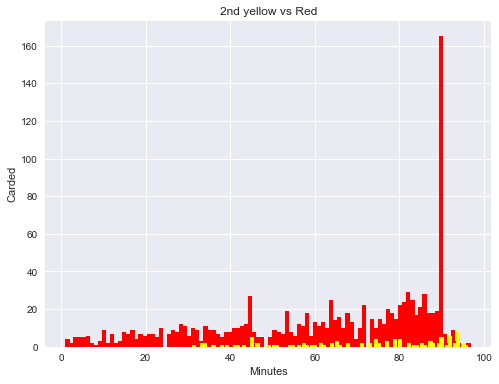

In [121]:
fig=plt.figure(figsize=(8,6))  
plt.hist(redcards.time,width=1,bins=100,color="red") 
plt.hist(yellowcard2.time,width=1,bins=100,color="yellow") 
plt.xlabel("Minutes")
plt.ylabel("Carded")
plt.title("2nd yellow vs Red")

In [24]:
goals.bodypart.value_counts()

right foot    13451
left foot      6758
head           4236
Name: bodypart, dtype: int64

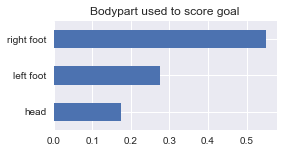

In [122]:
bp_used = goals.bodypart.value_counts()/len(goals.bodypart)
bp_used.plot(kind='barh',figsize=(4,2)).invert_yaxis()
plt.title('Event leading to goal')
plt.title('Bodypart used to score goal')

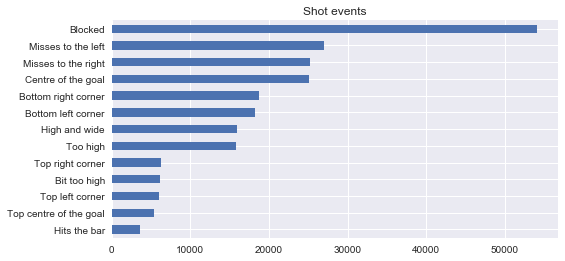

In [123]:
events.shot_place.value_counts().plot(kind='barh',figsize=(8,4)).invert_yaxis()
plt.title('Shot events')

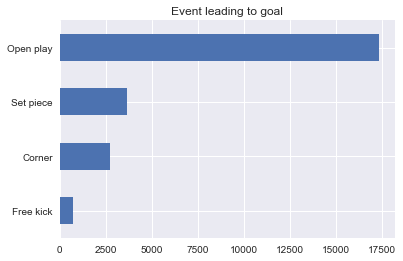

In [124]:
goals.situation.value_counts().plot(kind='barh').invert_yaxis()
plt.title('Event leading to goal')

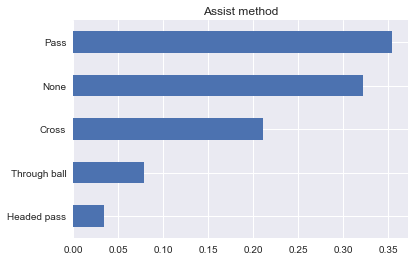

In [77]:
bp_used = goals.assist_method.value_counts()/len(goals.bodypart)
bp_used.plot(kind='barh').invert_yaxis()
plt.title('Assist method')

## How are Goals scored?

In [153]:
situation_goals = pd.crosstab(events.assist_method,goals.situation)

In [184]:
goals.shape[0]

24446

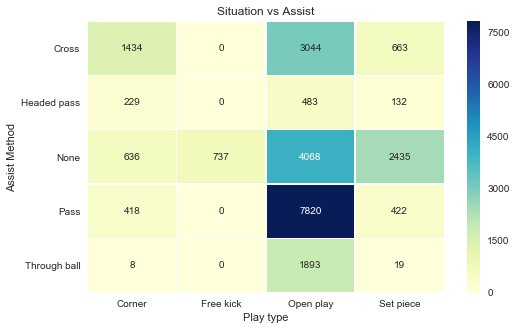

In [177]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title("Situation vs Assist")
sns.heatmap(situation_goals,cmap="YlGnBu",annot=True,fmt="d",linewidths=.5)
#; to supress output
plt.xlabel("Play type")
plt.ylabel("Assist Method");

We take a closer look at our assist methods and situations to get a more accurate version of how goals are scored. We visualise this using a heatmap.

We can see that Open play dominates the goals scoring. This should be obvious as football is a freeflowing game. Even in the more set piece oriented teams in england many goals will still be scored from crosses. Most of the goals are assisted either by passes or crosses. 

No Assist is awarded when the goal comes as a result of a misplaced pass by the opposition or a solo effort by the scorer. The scorer could have intercepted a misplaced pass or tacked an opposition player

### Same plot with percentages

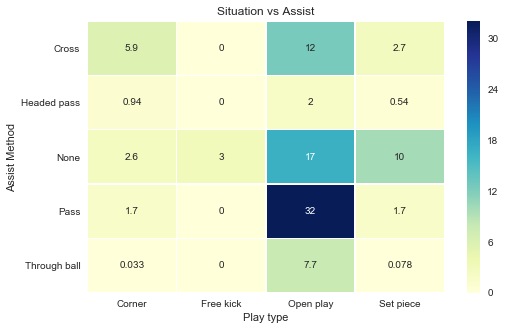

In [187]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title("Situation vs Assist")
sns.heatmap(situation_goals/goals.shape[0]*100,cmap="YlGnBu",annot=True,linewidths=.5)
#; to supress output
plt.xlabel("Play type")
plt.ylabel("Assist Method");

"Free kicks" that are passes are recorded as "Set Pieces"

In [33]:
pd.crosstab(events.shot_place,goals.is_goal)

is_goal,1.0
shot_place,
Bottom left corner,7212
Bottom right corner,6932
Centre of the goal,4446
Top left corner,2023
Top right corner,2157


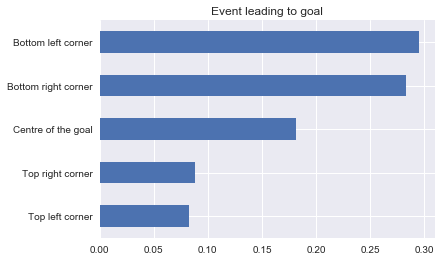

In [125]:
goals.shot_place.value_counts().divide(len(goals)).plot(kind='barh').invert_yaxis()
plt.title('Event leading to goal')

In [35]:
counts = events.shot_outcome.value_counts()
percent = events.shot_outcome.value_counts(normalize=True) \
           .mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent})

,counts,per
Off target,92827,40.6%
On target,78014,34.1%
Blocked,54082,23.7%
Hit the bar,3575,1.6%


In [36]:
events[(events['shot_outcome'] == 'On target')].is_goal.value_counts(normalize= True) * 100

0    69.472146
1    30.527854
Name: is_goal, dtype: float64

Only 34.1% of the shots are on target and of those only ~30.53% are goals. Any shot is on average a goal only a goal roughly 10% of the time. (this is only true for the given data which is probably only from top leagues)

# Home vs Away

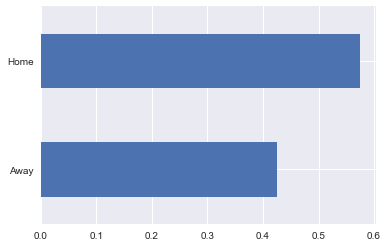

In [126]:
goals.side.value_counts().divide(len(goals)).plot(kind="barh").invert_yaxis()

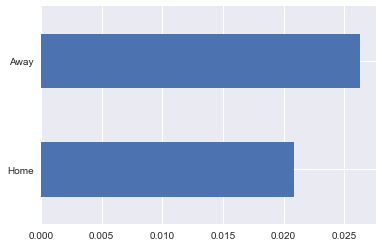

In [127]:
redcards.side.value_counts().divide(len(goals)).plot(kind="barh").invert_yaxis()

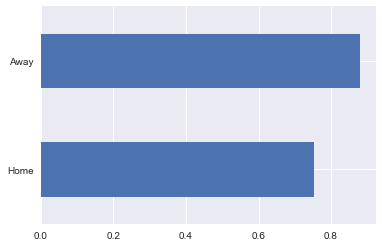

In [128]:
yellowcard.side.value_counts().divide(len(goals)).plot(kind="barh").invert_yaxis()

# Exploring Teams

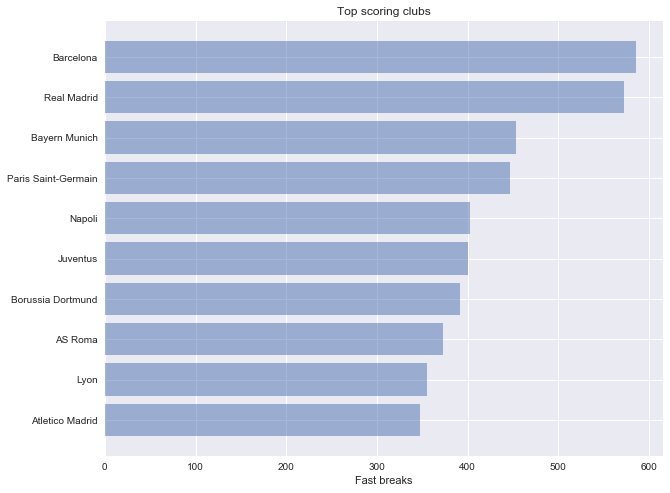

In [135]:
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,8))


top_scoring_teams = goals.event_team.value_counts().head(10)
values = top_scoring_teams.keys().tolist()
counts = top_scoring_teams.tolist()
y_pos = np.arange(len(values))

 
ax.barh(y_pos, counts, align='center', alpha=0.5)
ax.invert_yaxis()

plt.yticks(y_pos, values)
plt.xlabel('Fast breaks')
plt.title('Top scoring clubs')
 
plt.show()

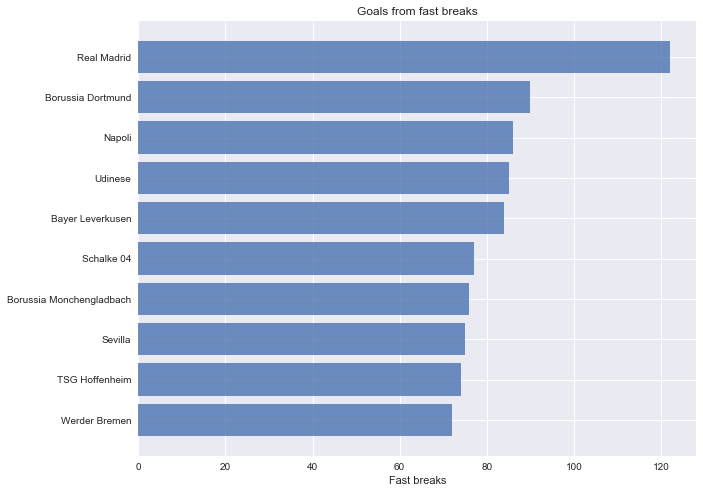

In [138]:
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,8))

top_counter_teams = events[events.fast_break == 1].event_team.value_counts().head(10)
values = top_counter_teams.keys().tolist()
counts = top_counter_teams.tolist()
y_pos = np.arange(len(values))

 
ax.barh(y_pos, counts, align='center',alpha=0.8)
ax.invert_yaxis()

plt.yticks(y_pos, values)
plt.xlabel('Fast breaks')
plt.title('Goals from fast breaks')
 
plt.show()

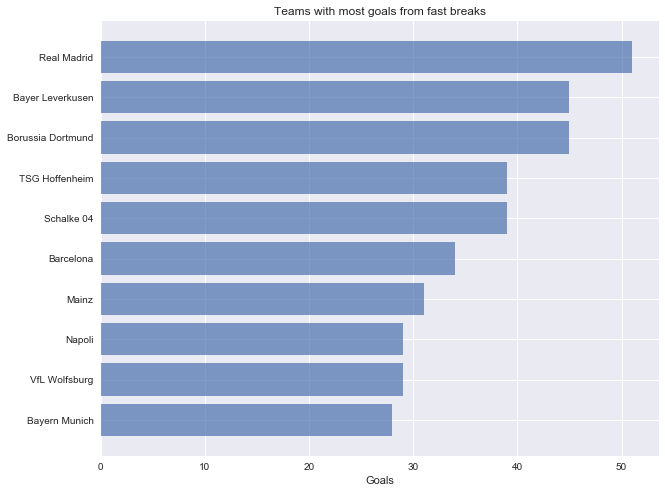

In [139]:

#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,8))

top_counter_teams = goals[goals.fast_break == 1].event_team.value_counts().head(10)
values = top_counter_teams.keys().tolist()
counts = top_counter_teams.tolist()
y_pos = np.arange(len(values))

 
ax.barh(y_pos, counts, align='center', alpha=0.7)
ax.invert_yaxis()

plt.yticks(y_pos, values)
plt.xlabel('Goals')
plt.title('Teams with most goals from fast breaks')
 
plt.show()

In [87]:
def defineWinner(row):
    if row['fthg'] > row['ftag']:
        row['result'] = row['ht']
    elif row['ftag'] > row['fthg']:
        row['result'] = row['at']
    elif row['fthg'] == row['ftag']:
        row['result'] = 'Draw'
    else: # For when scores are missing, etc (should be none)
        row['result'] = None
    return row
ginf = ginf.apply(defineWinner, axis=1)

In [143]:
winners = ginf.result.value_counts()
winners = winners[1:11]

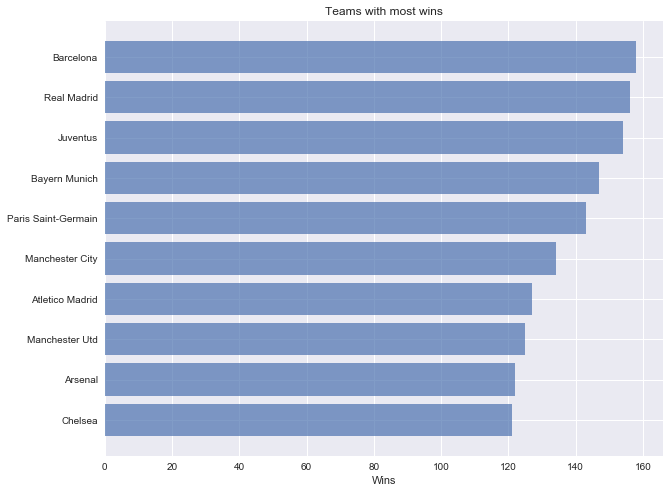

In [144]:
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,8))

values = winners.keys().tolist()
counts = winners.tolist()
y_pos = np.arange(len(values))

 
ax.barh(y_pos, counts, align='center', alpha=0.7)
ax.invert_yaxis()

plt.yticks(y_pos, values)
plt.xlabel('Wins')
plt.title('Teams with most wins')
 
plt.show()

# Plotly

In [66]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0

2.0.11


In [72]:
from plotly.graph_objs import Scatter, Figure, Layout

plot1 = plot([go.Bar(x=values, y=counts)])

In [188]:
plot2 = plot([go.Bar(y=values, x=counts, orientation='h')])